In [103]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [104]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias
x_train,y_train = X[:int(0.8*len(X))], y[:int(0.8*len(X))]

x_test,y_test=X[int(0.8*len(X)):], y[int(0.8*len(X)):]

In [105]:
def plot_predictons(train_data=x_train,train_labels=y_train,test_data=x_test,test_labels=y_test,prediction=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels,c="b",s=4,label="Training data")

  plt.scatter(test_data,test_labels,c="r",s=4,label="Testing Data")

  if prediction is not None:
    plt.scatter(test_data,prediction,c="y",s=4,label="Prediction")

  plt.legend(prop={"size":14});


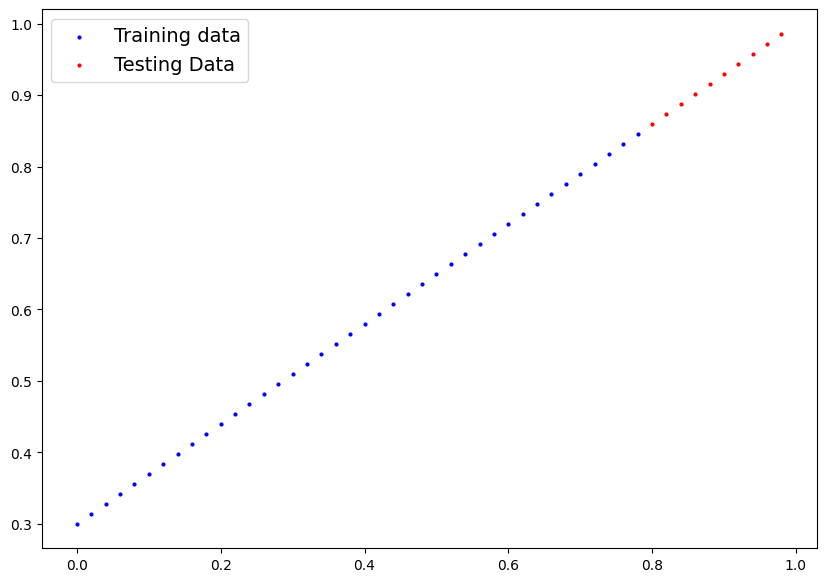

In [106]:
plot_predictons();

In [107]:
seed =  torch.manual_seed(50)
class First_Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  def forward(self,x: torch.Tensor)->torch.Tensor:
      return self.weights * x + self.bias



In [108]:
model = First_Model()

In [109]:
loss = nn.L1Loss()

optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [154]:
epochs = 100
for epoch in range(epochs):
  model.train()
  y_pred = model(x_train)
  loss_ = loss(y_pred,y_train)
  optimizer.zero_grad()
  loss_.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_pred = model(x_test)
    test_loss = loss(test_pred,y_test)
  if epoch % 10 == 0:
    print(f"Epoch:{epoch} | Loss:{loss} | test loss:{test_loss}")


RuntimeError: The size of tensor a (1600) must match the size of tensor b (50) at non-singleton dimension 0

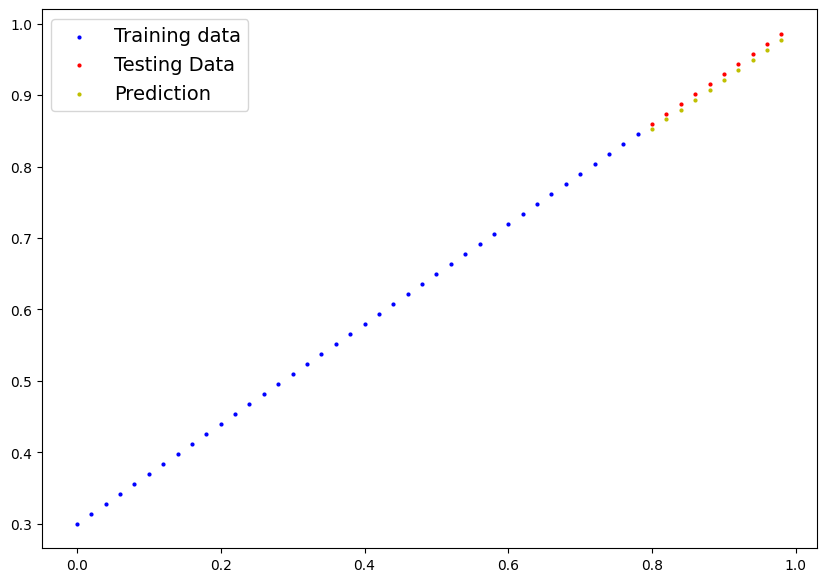

In [118]:
with torch.inference_mode():
  y_preds_new = model(x_test)

plot_predictons(prediction=y_preds_new)

<h1>
Linear Regression Model

</h1>

In [157]:
weight = 0.7
bias = 0.3

start = 0
end = 2
step = 0.001

x = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias
testing_split = int(len(x)*0.8)
x_train,y_train = x[:testing_split],y[:testing_split]
x_test,y_test = x[testing_split:],y[testing_split:]

seed = torch.manual_seed(12)

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = nn.Linear(1 ,1)

  def forward(self,x:torch.Tensor)-> torch.Tensor:
    return self.l1(x)

model = LinearRegressionModel()
loss = nn.L1Loss()
opti = torch.optim.SGD(lr=0.01,params=model.parameters())
epochs = 100
torch.manual_seed(42)

for epoch in range(epochs):
    model.train()
    y_pred = model(x_train)
    loss_ = loss(y_pred,y_train)
    optimizer.zero_grad()
    loss_.backward()
    optimizer.step()
    model.eval()
    with torch.inference_mode():
      test_pred = model(x_test)
      test_loss = loss(test_pred,y_test)
    if epoch % 10 == 0:
      print(f"Epoch:{epoch} | Loss:{loss} | test loss:{test_loss}")


RuntimeError: The size of tensor a (1600) must match the size of tensor b (50) at non-singleton dimension 0

ValueError: x and y must be the same size

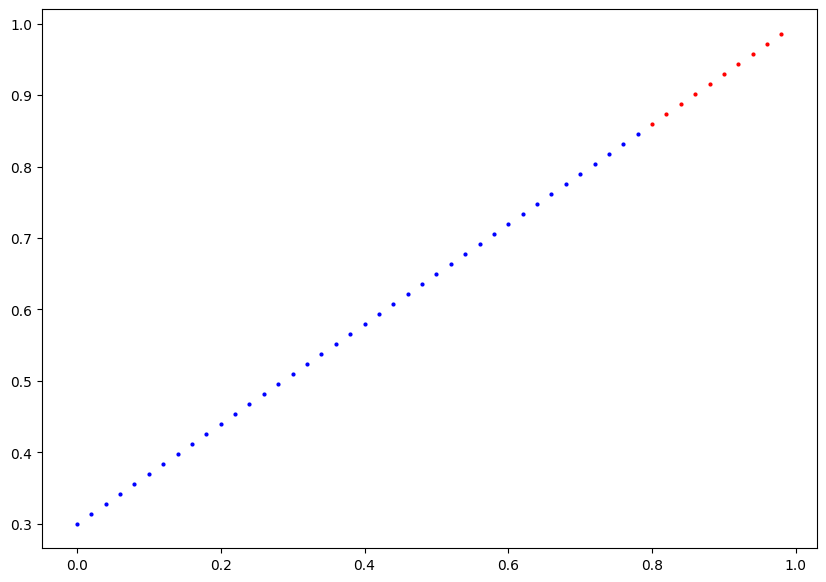

In [135]:
with torch.inference_mode():
  y_preds_new = model(x_test)

plot_predictons(prediction=y_preds_new)